In [1]:
import pandas as pd, numpy as np
data = pd.read_csv('Advertising/Advertising.csv')

In [2]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [3]:
print(data.head())


   index     TV  Radio  Newspaper  Sales
0      1  230.1   37.8       69.2   22.1
1      2   44.5   39.3       45.1   10.4
2      3   17.2   45.9       69.3    9.3
3      4  151.5   41.3       58.5   18.5
4      5  180.8   10.8       58.4   12.9


In [4]:
print(data)

     index     TV  Radio  Newspaper  Sales
0        1  230.1   37.8       69.2   22.1
1        2   44.5   39.3       45.1   10.4
2        3   17.2   45.9       69.3    9.3
3        4  151.5   41.3       58.5   18.5
4        5  180.8   10.8       58.4   12.9
..     ...    ...    ...        ...    ...
195    196   38.2    3.7       13.8    7.6
196    197   94.2    4.9        8.1    9.7
197    198  177.0    9.3        6.4   12.8
198    199  283.6   42.0       66.2   25.5
199    200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

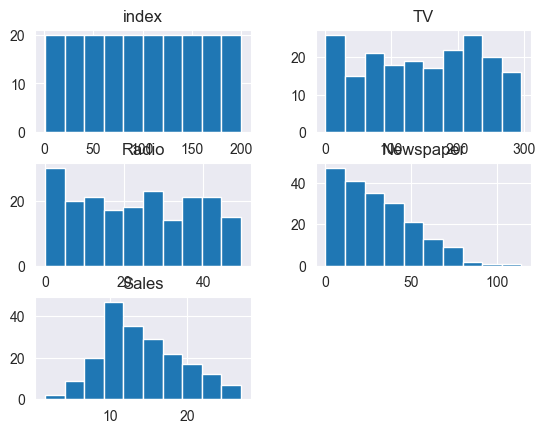

In [5]:
data.hist()

### Vamos a visualizar los datos

In [6]:
from matplotlib import pyplot as plt

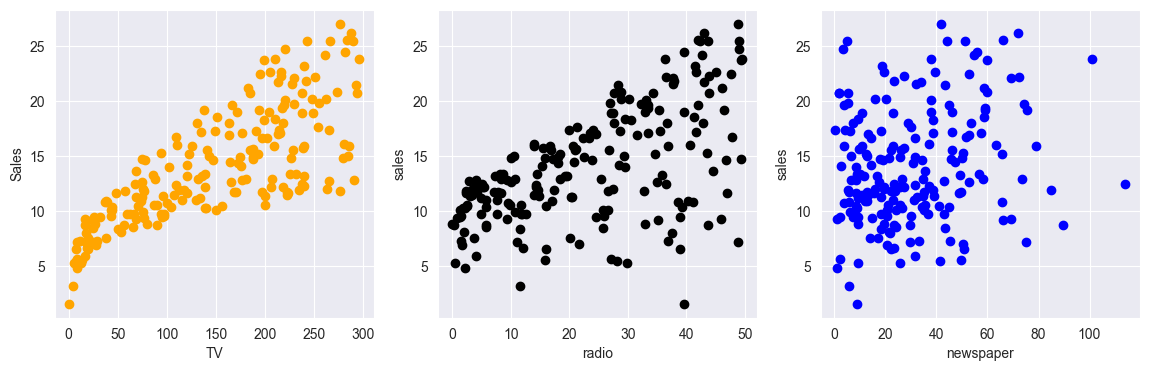

In [7]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.scatter(data['TV'], data['Sales'], color='orange')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1,3,2)
plt.scatter(data['Radio'], data['Sales'], color = 'black')
plt.xlabel('radio')
plt.ylabel('sales')

plt.subplot(1,3,3)
plt.scatter(data['Newspaper'], data['Sales'], color = 'blue')
plt.xlabel('newspaper')
plt.ylabel('sales')


plt.show()

### Para practicar programación veremos un modelo matemático sencillo llamado regresión lineal

La regresión lineal es una técnica estadística de aprendizaje supervisado para predecir la variable cuantitativa formando una relación lineal con una o más características independientes.

Ayuda a determinar:

- Si una variable independiente hace un buen trabajo en la predicción de la variable dependiente.
- Qué variable independiente desempeña un papel importante en la predicción de la variable dependiente.

Para que funcione los datos deben cumplir algunos criterios.


La regresión lineal encuentra los parámetros de la línea que mejor se ajusta a los datos, es decir, la pendiente ($\theta_1$) y la constante o intercepto ($\theta_0$) en este caso.

$$h_\theta(x) = \theta_1x + \theta_0$$


## Pero primero... veamos que tan relacionados están los datos

/var/folders/qc/0kbw0c7n6cg2vt6xf9gp3g2h0000gn/T/ipykernel_6608/3384655475.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


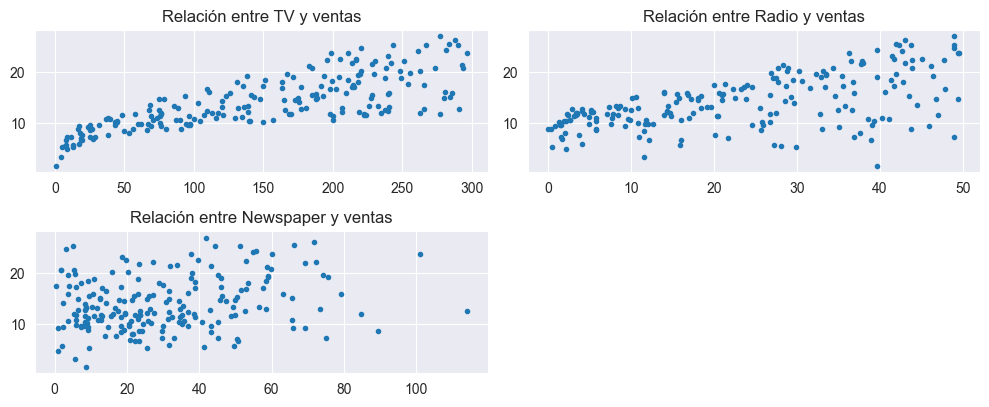

In [8]:
def plotCaracteristicas(col_list,title):
    plt.figure(figsize=(10, 14))
    i = 0
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(data[col],data["Sales"],marker='.',linestyle='none')
        plt.title(title % (col))
        plt.tight_layout()

col_names = ['TV', 'Radio', 'Newspaper']
plotCaracteristicas(col_names,"Relación entre %s y ventas")

Covarianza

La covarianza entre dos variables aleatorias $X$ e $Y$ se define como:
$$Cov(X, Y) = E[(X - E[X])(Y - E[Y])$$

Dado que las variables aleatorias $X$ e $Y$ son discretas y están definidas como $X = \{x_1, x_2,..., x_n\}$ y $Y = \{y_1, y_2,..., y_n\}$ con igual probabilidad para todos sus elementos entonces la covarianza se puede definir como:

$$Cov(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (x_i - E[X])(y_i - E[Y])$$

In [9]:
def covarianza(X, Y):
  suma = 0
  for x, y in zip(X, Y):
    suma +=((x - np.mean(X)) * (y - np.mean(Y)))
  return suma * 1/(len(X))

In [10]:
colnames = ['TV', 'Radio', 'Newspaper']

for col in colnames:
  print(covarianza(data[col],data['Sales']))

348.6382437499999
44.412509999999976
25.811684999999997


In [11]:
from numpy import cov

for col in colnames:
  print(cov(data[col],data['Sales'], bias = True)[0, 1])

348.63824375000013
44.412510000000005
25.811685000000008


Interpretación de la covarianza
Si ${\displaystyle Cov(X, Y)>{0}}$ hay dependencia directa (positiva), es decir, a grandes valores de ${\displaystyle X}$ corresponden grandes valores de ${\displaystyle Y}$.
Si ${\displaystyle Cov(X, Y)={0}}$ se interpreta como la no existencia de una relación lineal entre las dos variables.
Si ${\displaystyle Cov(X, Y)<{0}}$ hay dependencia inversa o negativa, es decir, a grandes valores de ${\displaystyle X}$ corresponden pequeños valores de ${\displaystyle Y}$.

###Caso Multivariable###
Si $\mathbf {X}$ es un vector aleatorio de dimensión $n$, es decir, $\mathbf {X}$ $=(X_{1},\ldots ,X_{n})^{t}$ donde $X_i$ para $i=1,2,\dots ,n$ son variables aleatorias, la matriz de covarianza, denotada por $\Sigma$, está dada por
$$
{\displaystyle \Sigma ={\begin{pmatrix}\operatorname {Cov} (X_{1},X_{1})&\operatorname {Cov} (X_{1},X_{2})&\cdots &\operatorname {Cov} (X_{1},X_{n})\\\operatorname {Cov} (X_{2},X_{1})&\operatorname {Cov} (X_{2},X_{2})&\cdots &\operatorname {Cov} (X_{2},X_{n})\\\vdots &\vdots &\ddots &\vdots \\\operatorname {Cov} (X_{n},X_{1})&\operatorname {Cov} (X_{n},X_{2})&\cdots &\operatorname {Cov} (X_{n},X_{n})\end{pmatrix}}}$$

es decir, la ${(i,j)}$-ésima entrada de ${\Sigma }$ corresponde a la covarianza entre ${X_{i}}$ y ${X_{j}}$ que puede ser representada como

## Implementar y aplicar a los cuatro vectores que forman parte de los datos que utilizamos.

In [12]:
col_names = ['TV', 'Radio', 'Newspaper', 'Sales']

matrix = [['_________'] + col_names]
for col1 in col_names:
  row = [col1]
  for col2 in col_names:
    # print(col1, col2)
    row.append(covarianza(data[col1],data[col2]))
  matrix.append(row)

# print(matrix)
for row in matrix:
    print(row)



['_________', 'TV', 'Radio', 'Newspaper', 'Sales']
['TV', 7334.095143750006, 69.51317999999996, 105.38985499999998, 348.6382437499999]
['Radio', 69.51317999999996, 219.32560400000003, 113.92449400000008, 44.412509999999976]
['Newspaper', 105.38985499999998, 113.92449400000008, 471.9367840000003, 25.811684999999997]
['Sales', 348.6382437499999, 44.412509999999976, 25.811684999999997, 27.085743749999985]


In [13]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']
print(data[colnames].cov())

                    TV       Radio   Newspaper       Sales
TV         7370.949893   69.862492  105.919452  350.390195
Radio        69.862492  220.427743  114.496979   44.635688
Newspaper   105.919452  114.496979  474.308326   25.941392
Sales       350.390195   44.635688   25.941392   27.221853


### El problema es que no son valores fáciles de interpretar.

#### Correlación de Pearson

Dado un par de variables aleatorias ${\displaystyle (X,Y)}$, el coeficiente de correlación poblacional de Pearson (también denotado por ${\displaystyle \rho _{X,Y}}$) se define como

$${\displaystyle \rho _{X,Y}={\sigma _{XY} \over \sigma _{X}\sigma _{Y}}={\frac {\operatorname {Cov} (X,Y)}{\sqrt {\operatorname {Var} (X)\operatorname {Var} (Y)}}}}$$

donde

- ${\displaystyle \sigma _{XY}}$ es la covarianza de ${\displaystyle (X,Y)}$
- ${\displaystyle \sigma _{X}}$ es la desviación estándar de la variable ${\displaystyle X}$
- ${\displaystyle \sigma _{Y}}$ es la desviación estándar de la variable $Y$

In [14]:
import math

def covarianza(X, Y):
  suma = 0
  for x, y in zip(X, Y):
    suma +=((x - np.mean(X)) * (y - np.mean(Y)))
  return suma * 1/((len(X) -1))

def correlacion_Pearson(X, Y):
  return covarianza(X, Y) / math.sqrt(covarianza(X, X) * covarianza(Y, Y))

colnames = ['TV', 'Radio', 'Newspaper']

for col in colnames:
  print(correlacion_Pearson(data[col], data['Sales']))


0.7822244248616061
0.576222574571055
0.22829902637616534


In [15]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']
print(data[colnames].corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


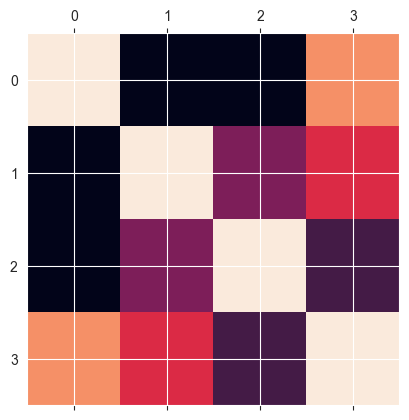

In [16]:
from matplotlib import pyplot as plt

plt.matshow(data[colnames].corr())

In [17]:
import seaborn as sns

def mapa_de_calor_correlacion(data):
    correlaciones = data[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();



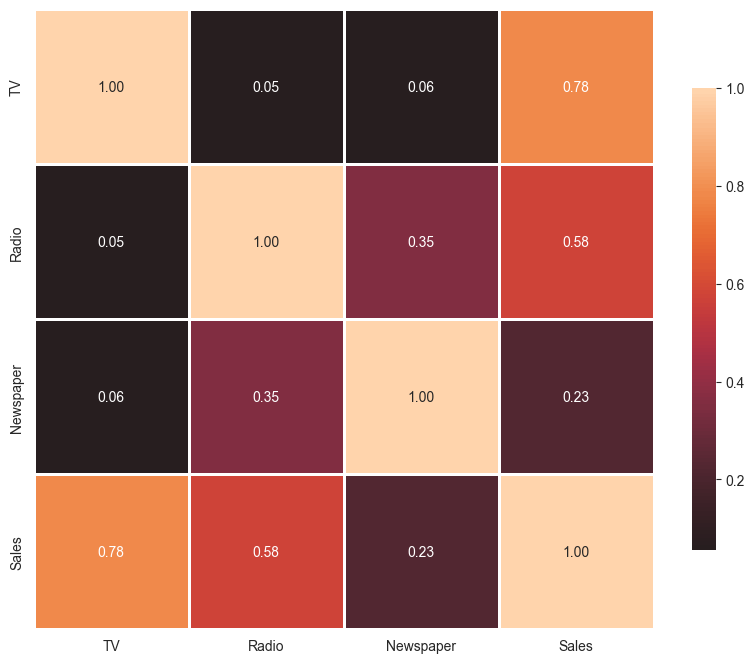

In [18]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']

mapa_de_calor_correlacion(data)

#### Correlación entre cigueñas y nacimiento de niños

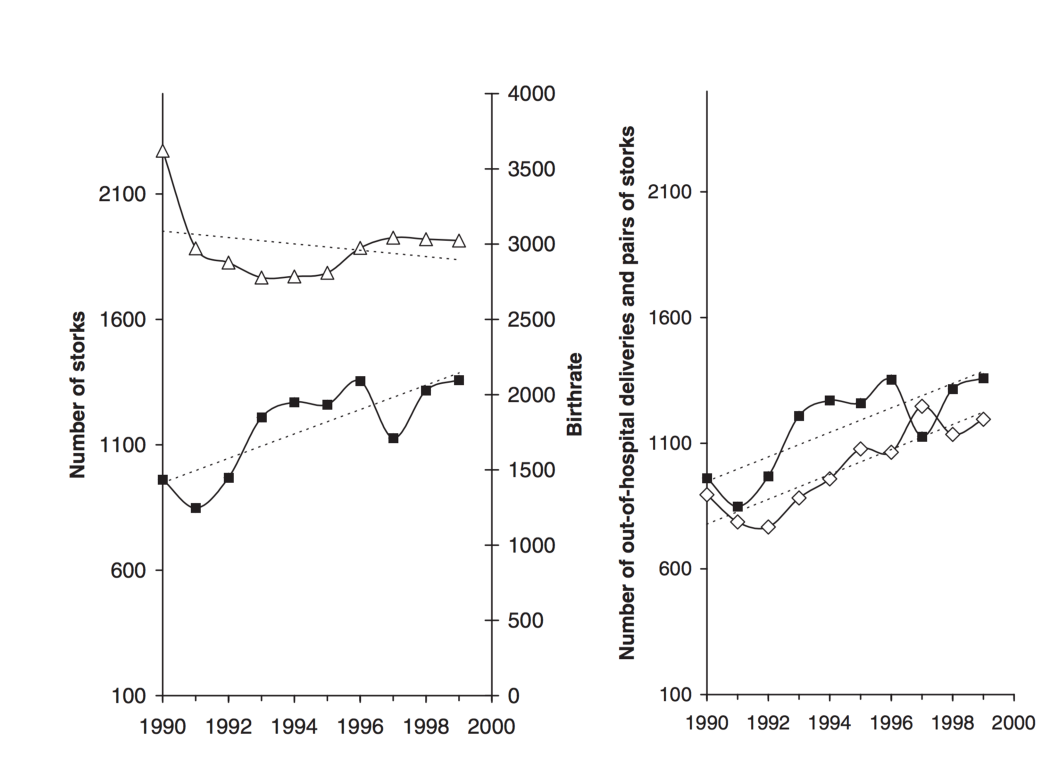

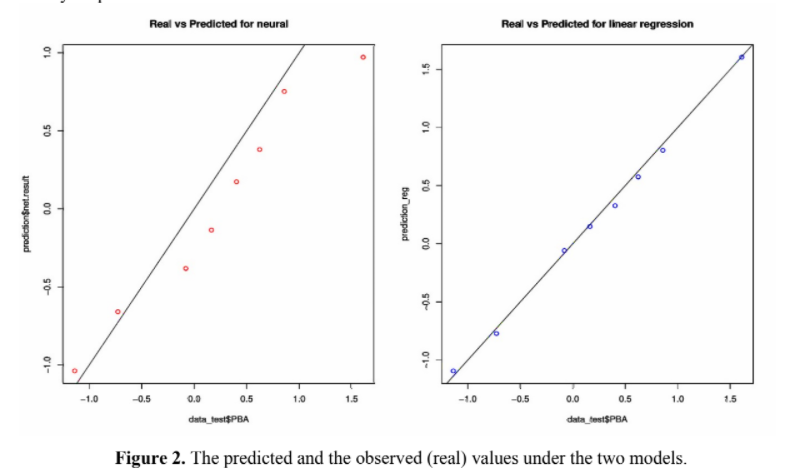

La regresión lineal encuentra los parámetros de la línea que mejor se ajusta a los datos, es decir, la pendiente ($\theta_1$) y la constante o intercepto ($\theta_0$) en este caso.

$$h_\theta(x) = \theta_1x + \theta_0$$

A partir de ahora llamaremos a $h_\theta(x)$ hipótesis

## ¿Cómo medimos el rendimiento de nuestro modelo?

### Función de costo

Una función de costo nos dice básicamente "lo bueno" que es nuestro modelo a la hora de hacer predicciones.

En nuestro caso función de costo es una función que calcula el error entre los valores de ventas (objetivo) predichos por nuestra hipótesis $h$ y la publicidad realizada en TV, radio o periódicos en el conjunto de entrenamiento.


- Error Cuadrático Medio (MSE, por sus sigles en inglés)- l2

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$

- Error Absoluto Medio (MAE, por sus sigles en inglés) -l1

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}|h_\theta(x_i)- y_i|$$

Aquí $h$ es el valor predicho por nuestro modelos $m$ es el número de muestras.

Programen la función

80, 0.05


In [19]:
def MSE(h, Y):
  return np.sum((h - Y) ** 2) / (2 * (len(h)))

def aplica_hipotesis(X, theta_0, theta_1):
  return theta_1 * X + theta_0

def cal_costo(X, Y, theta_0, theta_1):
  h = aplica_hipotesis(X, theta_0, theta_1)
  cost = MSE(h, Y)
  return h, cost

def plot(X, Y, theta_0, theta_1):
  x = np.linspace(0, X.max(), len(X))
  plt.plot(X, Y, marker='.', linestyle='none', label='Y data')
  plt.plot(x, aplica_hipotesis(x, theta_0, theta_1), label='model line')
  plt.legend(loc="upper left")
  plt.show()

### Ajustando nuestro modelo al tanteo

MSE  =  2693.8955299374998


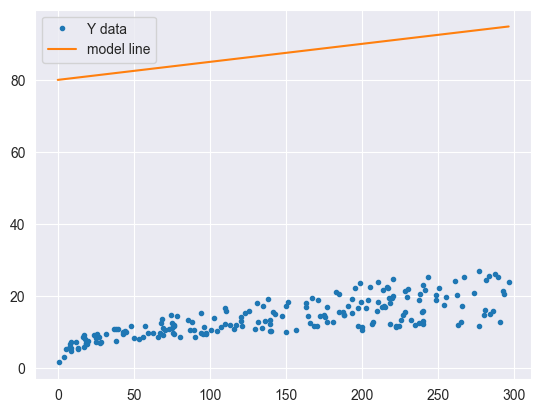

In [20]:
theta_0, theta_1 = 80, 0.05
X, Y = data['TV'].to_numpy(),data["Sales"].to_numpy()
h, cost = cal_costo(X, Y, theta_0, theta_1)
print('MSE  = ', cost)
plot(X, Y, theta_0, theta_1)


MSE  =  131.237325


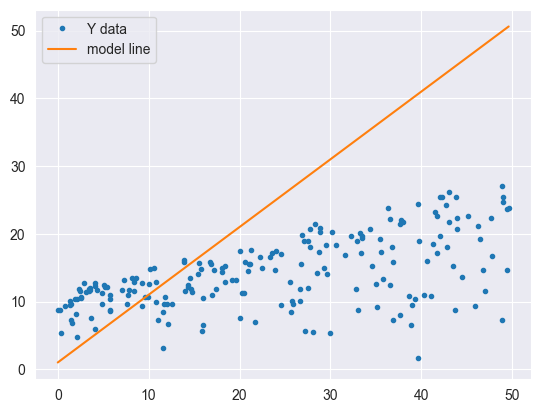

In [21]:
theta_0, theta_1 = 1, 1
X, Y = data['Radio'].to_numpy(),data["Sales"].to_numpy()
h, cost = cal_costo(X, Y, theta_0, theta_1)
print('MSE  = ', cost)
plot(X, Y, theta_0, theta_1)

MSE  =  5.3329049375


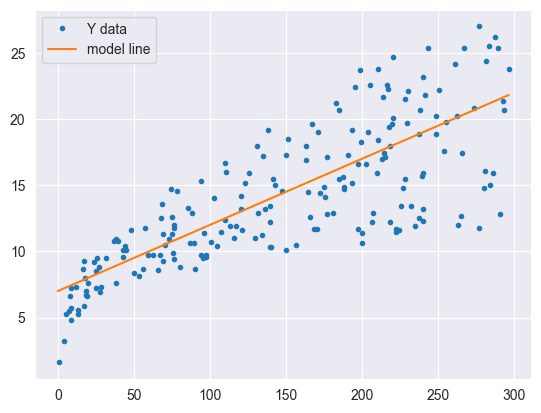

In [22]:
theta_0, theta_1 = 7, .05
X, Y = data['TV'].to_numpy(),data["Sales"].to_numpy()
h, cost = cal_costo(X, Y, theta_0, theta_1)
print('MSE  = ', cost)
plot(X, Y, theta_0, theta_1)

Estime los mejores valores para $\theta_0$ y $\theta_1$. Es decir:

$$\min_\theta J(\theta)$$


Es decir, intentamos mejorar nuestra hipótesis $h_\theta(x)$, en aprendizaje automático esto es aprender.

### Realizar el ejercicio de articulos_ml y mandar reporte
Leer sobre funciones de costo, gradiente descendente, mínimos cuadrados

-

-

-

-

### Como automatizar el proceso?

Esencialmente, hay dos cosas que debes saber para alcanzar los mínimos:
- qué camino tomar y
- qué tamaño de paso dar.

## ¿Cómo minimizamos la función de costo?

Los algoritmos de optimización (en el caso de la minimización) tienen uno de los siguientes objetivos

- Encontrar el mínimo global de la función objetivo. Esto es factible si la función objetivo es convexa, es decir, cualquier mínimo local es un mínimo global.
- Encontrar el menor valor posible de la función objetivo dentro de su vecindad. Este suele ser el caso si la función objetivo no es convexa, como ocurre en la mayoría de los problemas de aprendizaje profundo.



### Creemos una función ejemplo

$$y = (x + 3)^2$$

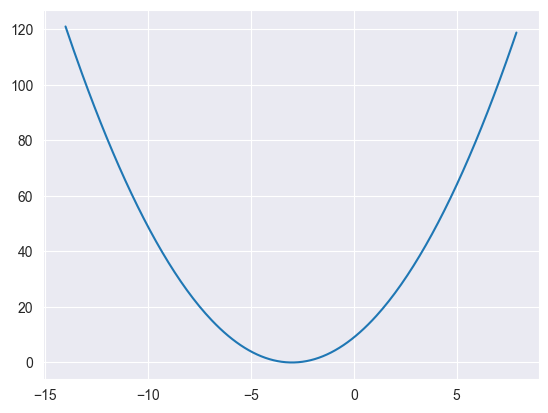

In [23]:
x = np.arange(-14, 8, 0.1)
y = (x + 3) ** 2
plt.plot(x, y)
plt.show()

¿Cual es su mínimo?

Podemos usar cálculo, sabiendo que un punto crítico para una función derivable es $f'(x) = 0$

$$y = (x+3)^2$$
$$y' = 2 (x+3)$$
$$0 = 2(x+3)$$
$$x = -3$$

y ya que

$$y'' = 2$$

podemos decir que efectivamente es un mínimo



#¿Porqué no hacemos eso siempre?

### El gradiente descendente

 es un algoritmo de optimización para encontrar un mínimo local de una función diferenciable. El descenso gradual se utiliza simplemente para encontrar los valores de los parámetros de una función (coeficientes) que minimizan una función de costo en la medida de lo posible.


#### La derivada


En matemáticas, la derivada de una función mide la rapidez con la que cambia el valor de dicha función matemática, según cambie el valor de su variable independiente. La derivada de una función es un concepto local, es decir, se calcula como el límite de la rapidez de cambio media de la función en cierto intervalo, cuando el intervalo considerado para la variable independiente se torna cada vez más pequeño. Por ello se habla del valor de la derivada de una función en un punto dado.

$$f'(x) = \lim_{h\to 0}\frac{ f(x + h) - f(x)}{h}$$


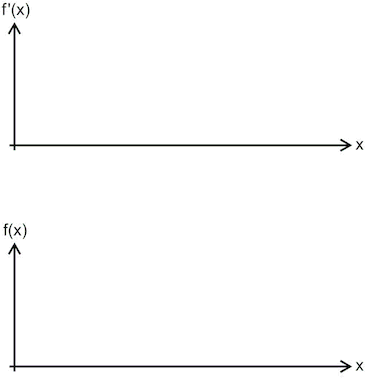


El gradiente es el conjunto de todas las derivadas parciales de una función. En el caso de machine learning, estamos interesados en el gradiente de la función de costo.

$$\nabla f =\left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n}\right] $$


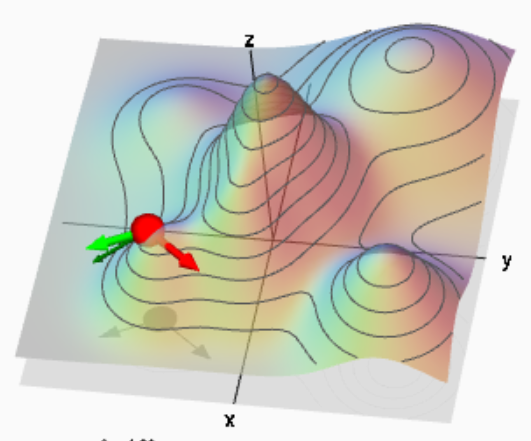

### El algoritmo de gradiente descendente

repetir hasta convergencia o se es alcanzado un número de épocas determinado {

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)$ (para todos los $j$)

}

Donde $\alpha$ es la tasa de aprendizaje

Sustituyamos la función de costo MSE:

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_i}J(\theta)$$

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$


¿Cuántos parámetros $\theta$ tenemos en nuestro modelo lineal?

Debemos actualizar los pesos para $\theta_0$ y $\theta_1$, por tanto:



$$\theta_0 := \theta_0 - \alpha \frac{1}{2m}\frac{\partial}{\partial\theta_0}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$
$$\theta_1 := \theta_1 - \alpha \frac{1}{2m}\frac{\partial}{\partial\theta_1}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$

¿Cuánto valen las derivadas parciales que se requieren calcular?

$$\frac{\partial}{\partial\theta_0}\sum_{i=1}^{m}(h_\theta(x_i)- y_i)^2$$

Pista: derivada de una potencia

$$2\sum_{i=1}^{m}(h_\theta(x_i)- y_i)\frac{\partial}{\partial\theta_0}(h_\theta(x_i)- y_i)$$

Pero:

$$h_\theta(x) = \theta_1x + \theta_0$$

Entonces:


$$2\sum_{i=1}^{m}(h_\theta(x_i)- y_i)\frac{\partial}{\partial\theta_0}(\theta_1x_i + \theta_0 - y_i)$$

$$2\sum_{i=1}^{m}(h_\theta(x_i)- y_i)1$$

Por tanto:

$$\theta_0 := \theta_0 - \frac{\alpha}{m} \sum_{i=1}^{m}(h_\theta(x_i)- y_i)$$

¿Cuánto es el valor de  $\theta_1$

$$\theta_1 := \theta_1 - \frac{\alpha}{m} \sum_{i=1}^{m}(h_\theta(x_i)- y_i)x_i$$

Tarea:
- Implementar gradiente descendente
- Aplicar gradiente descendente a nuestro problema usando las funciones de costo MSE y MAE, ademas probar para valores de $\alpha = 0.001, 0.01$ y $0.1$
- Aplicar regresión lineal a alos datos nuevos

In [24]:
def gradiente_descendente(X, Y, theta0 = 1, theta1 = 1, alfa = 0.01, epocas = 1000):
  m = len(X)
  for e in range(epocas):
    d_theta0, d_theta1 = 0, 0
    for i in range(m):
      hi = theta_1 * X[i] + theta0
      d_theta0 += hi - Y[i]
      d_theta1 += (hi - Y[i]) * X[i]

    theta0 -= (d_theta0 / m) * alfa
    theta1 -= (d_theta1 / m) * alfa
    print(theta0, theta1, cal_costo(X, Y, theta0, theta1))
  return theta0, theta1

In [25]:
a=0
b=0
alpha = 0.001
iters = 100

x = np.array(x)
y = np.array(y)


print(type(x), x.shape)

h, cost = cal_costo(x, y, a, b)
print(a, b, cost)

a,b = gradiente_descendente(x, y, a, b, alpha, iters)

h, cost = cal_costo(x, y, a, b)
print(a, b, cost)

<class 'numpy.ndarray'> (220,)
0 0 1464.3016649999795
0.04048749999999972 -0.12953675000000395 (array([ 1.85400200e+00,  1.84104833e+00,  1.82809465e+00,  1.81514098e+00,
        1.80218730e+00,  1.78923363e+00,  1.77627995e+00,  1.76332628e+00,
        1.75037260e+00,  1.73741893e+00,  1.72446525e+00,  1.71151158e+00,
        1.69855790e+00,  1.68560423e+00,  1.67265055e+00,  1.65969688e+00,
        1.64674320e+00,  1.63378953e+00,  1.62083585e+00,  1.60788218e+00,
        1.59492850e+00,  1.58197483e+00,  1.56902115e+00,  1.55606748e+00,
        1.54311380e+00,  1.53016013e+00,  1.51720645e+00,  1.50425278e+00,
        1.49129910e+00,  1.47834543e+00,  1.46539175e+00,  1.45243808e+00,
        1.43948440e+00,  1.42653073e+00,  1.41357705e+00,  1.40062338e+00,
        1.38766970e+00,  1.37471603e+00,  1.36176235e+00,  1.34880868e+00,
        1.33585500e+00,  1.32290133e+00,  1.30994765e+00,  1.29699398e+00,
        1.28404030e+00,  1.27108663e+00,  1.25813295e+00,  1.24517928e+00,
    

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((len(X), 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)


print(reg.coef_, reg.intercept_)


[0.04753664] 7.0325935491276885
